# Introducing Jupyter Notebooks
First, set up the environment:

In [31]:
import matplotlib
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd

try:
    from IPython import get_ipython

    get_ipython().run_line_magic("matplotlib", "inline")
except AttributeError:
    print("Magic function can only be used in IPython environment")
    matplotlib.use("Agg")

pl.rcParams["figure.figsize"] = [15, 8]

Then, set up ctdcal

Next, load in some test data

In [28]:
import requests
from io import BytesIO

# retrieve data file from CCHDO
fname = "https://cchdo.ucsd.edu/data/19436/325020210316_hy1.csv"
content = requests.get(fname).content

# find row of units, which must be skipped for pandas to load file properly
lines = content.split(b"\n")
for idx, line in enumerate(lines):
    if line.startswith(b"EXPOCODE"):
        units = idx + 1
        break

# read data file into pandas DataFrame
data = pd.read_csv(
    BytesIO(content),
    skiprows=[0, units],
    skipfooter=1,
    engine="python",
    comment="#",
    skipinitialspace=True,
)


Plot something!

<AxesSubplot:title={'center':'SALNTY-CTDSAL vs. CTDPRS'}, xlabel='Residual', ylabel='Pressure (dbar)'>

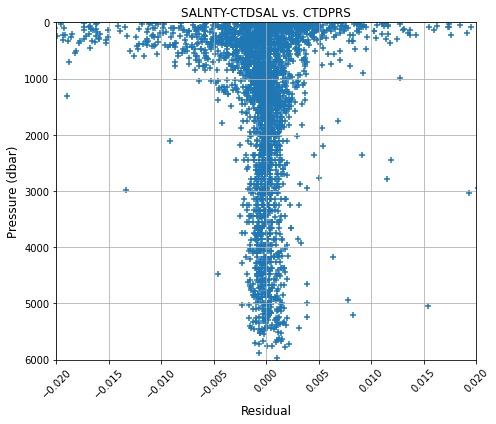

In [47]:
from ctdcal import get_ctdcal_config, ctd_plots

cfg = get_ctdcal_config()

ctd_plots.residual_vs_pressure(
    data[cfg.column["sal"]], data[cfg.column["refS"]], data[cfg.column["p"]], grid=True
)
